## Taller Random Forest y Naive Bayes
##### Monitor: Juan Nicolas Piedrahita Salas

#### Introducción a la inteligencia artificial 2023-02

Este dataset contiene información sobre el clima en algunas ciudades de australia. El objetivo es predecir si va a llover o no en el día siguiente.

# 1. importar librerias

In [1]:
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# 2. importar dataset

In [2]:
data = pd.read_csv('AusDataForRainPred.csv')
data.drop(columns=['Date'], inplace=True)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

X = data.drop(columns='RainTomorrow')
y = data['RainTomorrow']

display(X,y)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No
1,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No
2,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No
3,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No
4,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,...,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No
56416,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,...,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No
56417,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,...,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No
56418,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,...,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No


0        No
1        No
2        No
3        No
4        No
         ..
56415    No
56416    No
56417    No
56418    No
56419    No
Name: RainTomorrow, Length: 56420, dtype: object

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       56420 non-null  object 
 1   MinTemp        56420 non-null  float64
 2   MaxTemp        56420 non-null  float64
 3   Rainfall       56420 non-null  float64
 4   Evaporation    56420 non-null  float64
 5   Sunshine       56420 non-null  float64
 6   WindGustDir    56420 non-null  object 
 7   WindGustSpeed  56420 non-null  float64
 8   WindDir9am     56420 non-null  object 
 9   WindDir3pm     56420 non-null  object 
 10  WindSpeed9am   56420 non-null  float64
 11  WindSpeed3pm   56420 non-null  float64
 12  Humidity9am    56420 non-null  float64
 13  Humidity3pm    56420 non-null  float64
 14  Pressure9am    56420 non-null  float64
 15  Pressure3pm    56420 non-null  float64
 16  Cloud9am       56420 non-null  float64
 17  Cloud3pm       56420 non-null  float64
 18  Temp9a

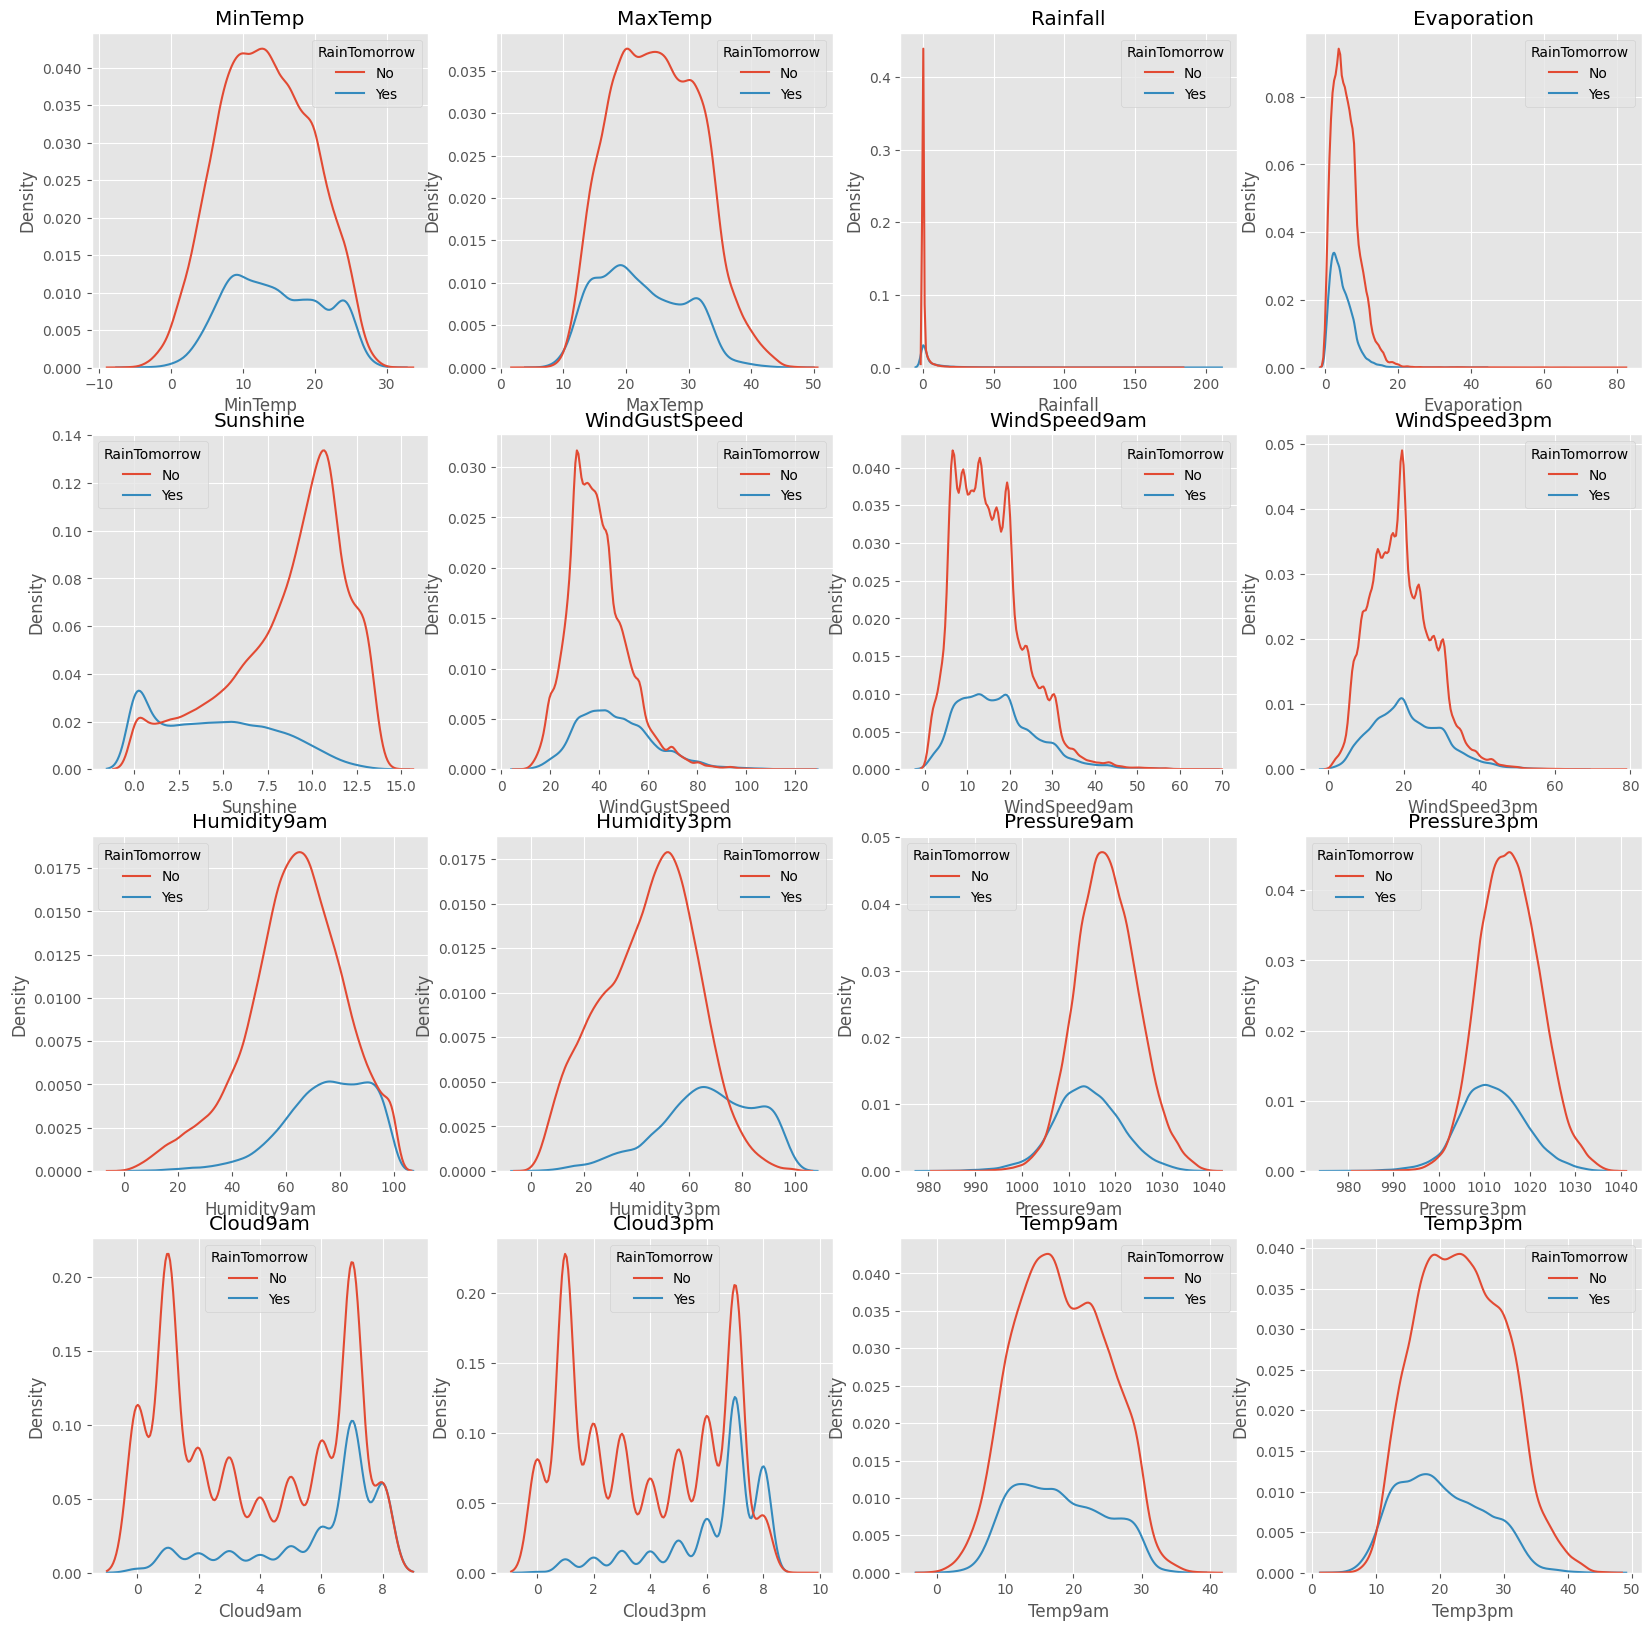

In [4]:
cols = data.select_dtypes(include=np.number).columns

_, axes = plt.subplots(4, 4, figsize=(20, 20))

axes = axes.flatten()
for i, col in enumerate(cols):
    sns.kdeplot(data=data, x=col, hue="RainTomorrow", ax=axes[i])
    axes[i].set_title(col)


plt.show()

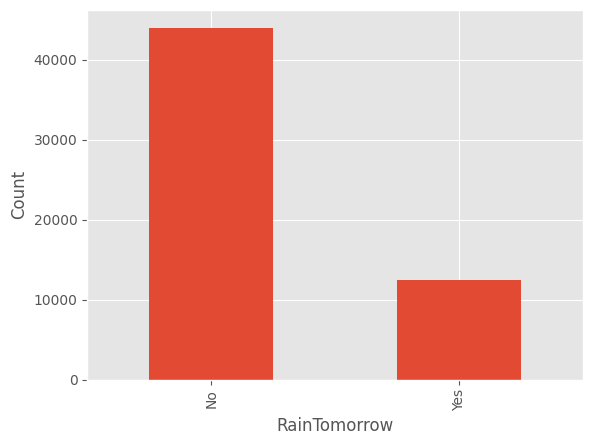

In [5]:
data['RainTomorrow'].value_counts().plot.bar()

plt.ylabel('Count')
plt.xlabel('RainTomorrow')
plt.show()

# 3. Preprocesamiento de datos

standard scaling

<img src="https://cdn-images-1.medium.com/max/370/1*Nlgc_wq2b-VfdawWX9MLWA.png"/>

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler

ColTransformer = ColumnTransformer(
    [
        ('StandardScaler', StandardScaler(), X.select_dtypes(include=[np.number]).columns),
        ('OrdinalEncoder', OrdinalEncoder(), X.select_dtypes(include=['object']).columns),
    ],
    remainder='passthrough',
    n_jobs=-1,
    verbose_feature_names_out=False
)

X = ColTransformer.fit_transform(X)
y = LabelEncoder().fit_transform(y)

# 4. Dividir el dataset en entrenamiento y prueba

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 5. buscar mejores hyperarametros tanto para el modelo de arbol como para el modelo de bosque

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2,3,4,5,6,4,7,8,9],
    "min_samples_split": range(2, 6 + 1, 2),
    "min_samples_leaf": range(2, 6 + 1, 2),
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(class_weight="balanced", random_state=42),
    param_grid=grid,
    n_jobs=-1,
)

grid_search.fit(X_train, y_train)

display(
    "mejores parametros",
    grid_search.best_params_,
    "",
    "mejor accurracy",
    grid_search.best_score_
)

'mejores parametros'

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

''

'mejor accurracy'

0.7822994210090986

In [ ]:
grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [12,13,14,15],
    "min_samples_split": range(2, 6 + 1, 2),
    "min_samples_leaf": range(2, 6 + 1, 2),
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight="balanced", random_state=42),
    param_grid=grid,
    n_jobs=-1,
)

grid_search.fit(X_train, y_train)

display(
    "mejores parametros",
    grid_search.best_params_,
    "",
    "mejor accurracy",
    grid_search.best_score_
)

'mejores parametros'

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

''

'mejor accurracy'

0.8539761313954862

# 6. entrenar modelos

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

modelDT = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 5,
    min_samples_leaf = 2,
    min_samples_split = 2,
    random_state=42,
    class_weight="balanced"
)
modelRF = RandomForestClassifier(
    criterion = 'entropy',
    max_depth = 14,
    min_samples_leaf = 2,
    min_samples_split = 2,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

modelDT.fit(X_train, y_train)
modelRF.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=14, min_samples_leaf=2, n_jobs=-1,
                       random_state=42)

# 7. analisis de metricas

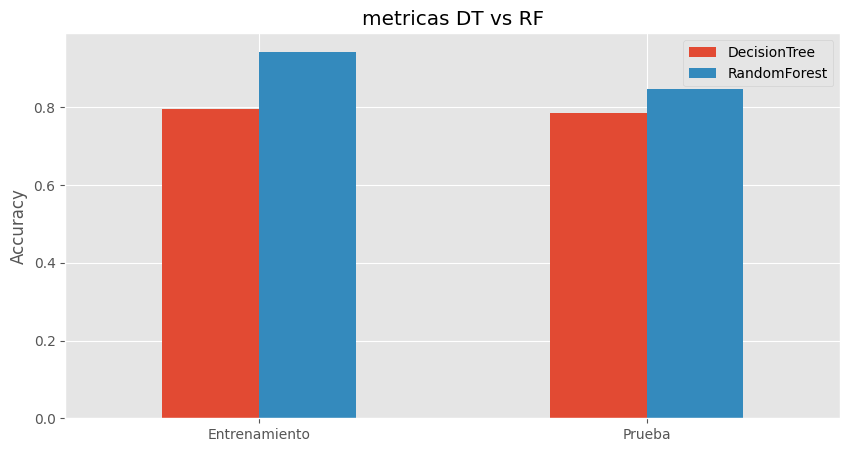

In [9]:
res = pd.DataFrame({"DecisionTree": [None, None], "RandomForest": [None, None]}, index=["Entrenamiento", "Prueba"])

res.loc["Entrenamiento", "DecisionTree"] = modelDT.score(X_train, y_train)
res.loc["Entrenamiento", "RandomForest"] = modelRF.score(X_train, y_train)

res.loc["Prueba", "DecisionTree"] = modelDT.score(X_test, y_test)
res.loc["Prueba", "RandomForest"] = modelRF.score(X_test, y_test)

res.plot.bar(rot=0, figsize=(10, 5))

plt.title("metricas DT vs RF")
plt.ylabel("Accuracy")
plt.show()

In [10]:
print('Decision Tree')
print('Train score: ', modelDT.score(X_train, y_train))
print('Test score: ', modelDT.score(X_test, y_test))

print()

print('Random Forest')
print('Train score: ', modelRF.score(X_train, y_train))
print('Test score: ', modelRF.score(X_test, y_test))

Decision Tree
Train score:  0.7948954271534917
Test score:  0.7860333215171925

Random Forest
Train score:  0.9436370081531372
Test score:  0.8465792272243885


#### matriz de confusion decision tree

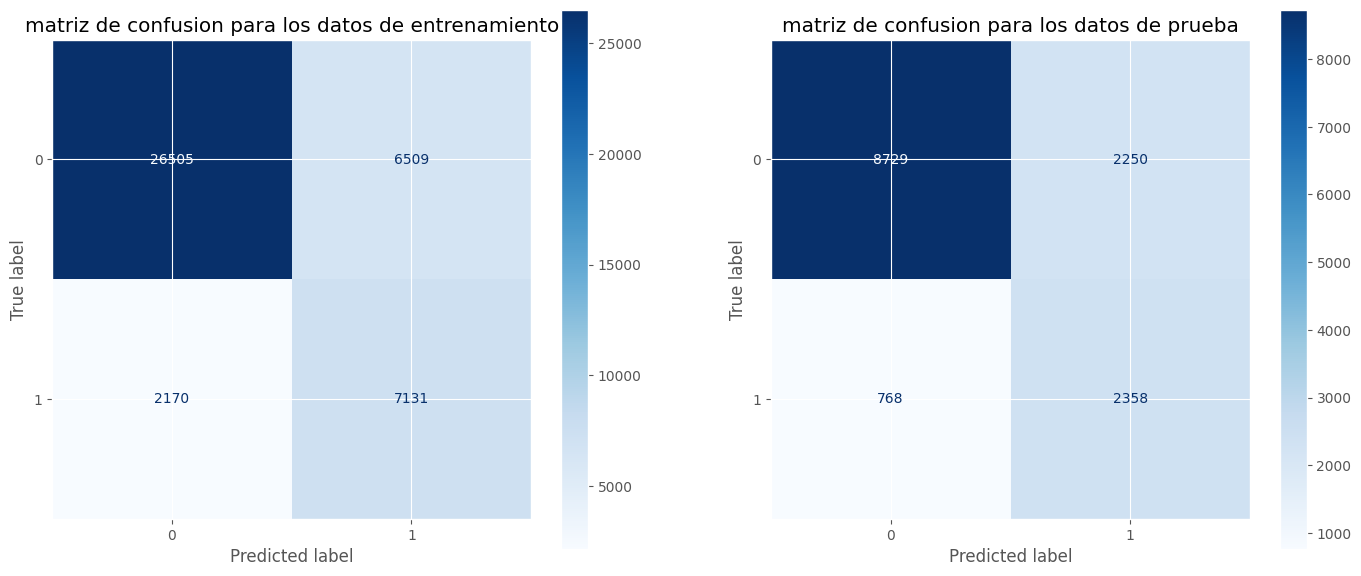

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 7))

cmTrain = ConfusionMatrixDisplay.from_estimator(
    estimator = modelDT,
    X = X_train,
    y = y_train,
    cmap = "Blues",
    ax = ax1
)

cmTest = ConfusionMatrixDisplay.from_estimator(
    estimator = modelDT,
    X = X_test,
    y = y_test,
    cmap="Blues",
    ax = ax2
)

cmTrain.ax_.set_title("matriz de confusion para los datos de entrenamiento")
cmTest.ax_.set_title("matriz de confusion para los datos de prueba")

plt.show()

#### matriz de confusion random forest

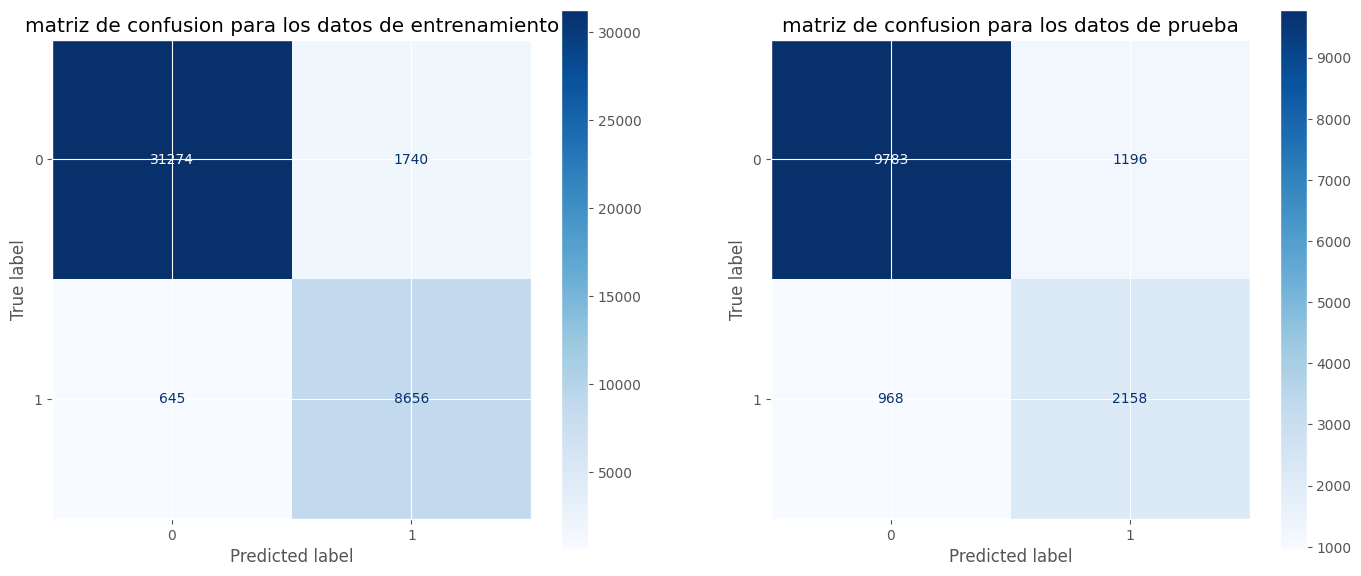

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 7))

cmTrain = ConfusionMatrixDisplay.from_estimator(
    estimator = modelRF,
    X = X_train,
    y = y_train,
    cmap = "Blues",
    ax = ax1
)

cmTest = ConfusionMatrixDisplay.from_estimator(
    estimator = modelRF,
    X = X_test,
    y = y_test,
    cmap="Blues",
    ax = ax2
)

cmTrain.ax_.set_title("matriz de confusion para los datos de entrenamiento")
cmTest.ax_.set_title("matriz de confusion para los datos de prueba")

plt.show()

vemos que el modelo Random Forest alcanza una mayor exactitud que el modelo Decision Tree, tanto en entrenamiento como en prueba.

## clasificacion bayesiana

In [13]:
from sklearn.naive_bayes import GaussianNB

modeloNB = GaussianNB()

modeloNB = modeloNB.fit(X_train, y_train)

#### exactitud del modelo

In [14]:
print("exactitud para el entrenamiento =", modeloNB.score(X_train, y_train))
print("exactitud para prueba =", modeloNB.score(X_test, y_test))

exactitud para el entrenamiento = 0.8018433179723502
exactitud para prueba = 0.7972350230414746


#### matrices de confusion

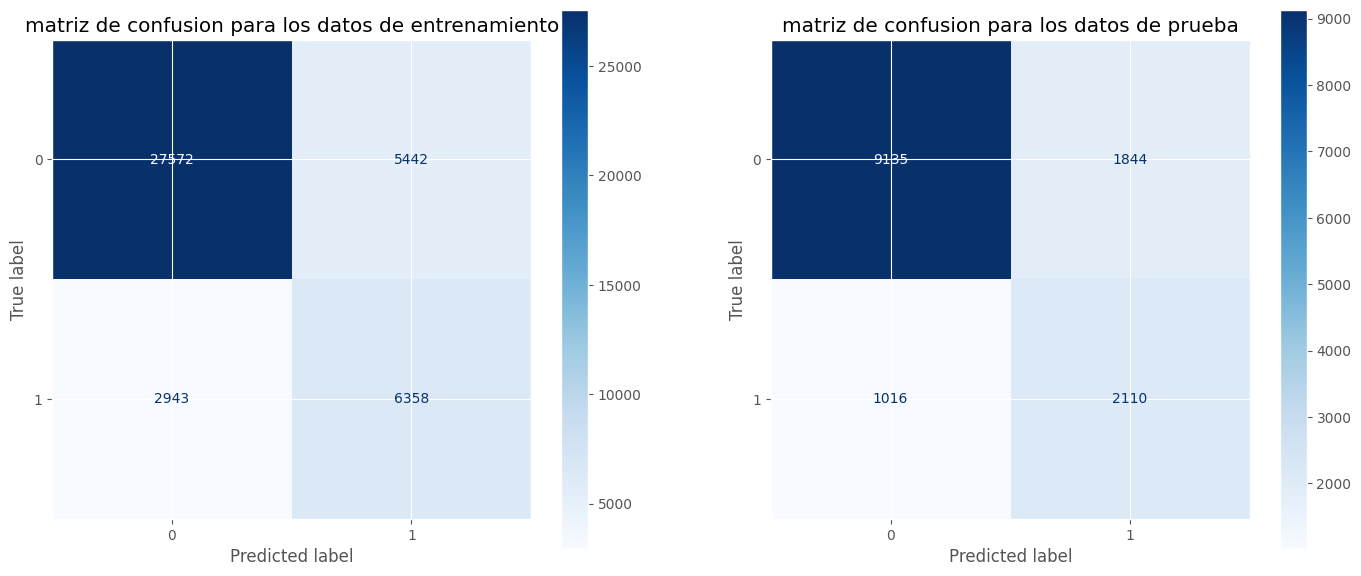

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 7))

cmTrain = ConfusionMatrixDisplay.from_estimator(
    estimator = modeloNB,
    X = X_train,
    y = y_train,
    cmap = "Blues",
    ax = ax1
)

cmTest = ConfusionMatrixDisplay.from_estimator(
    estimator = modeloNB,
    X = X_test,
    y = y_test,
    cmap="Blues",
    ax = ax2
)

cmTrain.ax_.set_title("matriz de confusion para los datos de entrenamiento")
cmTest.ax_.set_title("matriz de confusion para los datos de prueba")

plt.show()

### Comparacion final de los tres modelos

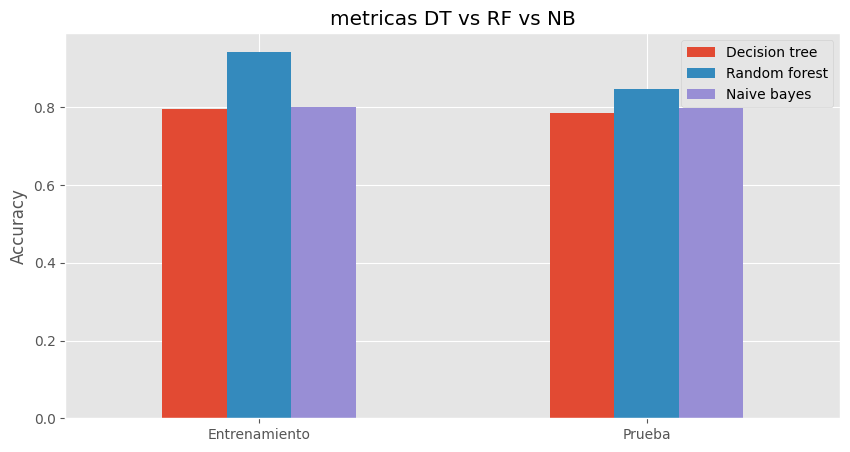

In [16]:
res = pd.DataFrame([], index=["Entrenamiento", "Prueba"], columns=["Decision tree", "Random forest", "Naive bayes"])

res["Decision tree"] = [modelDT.score(X_train, y_train), modelDT.score(X_test, y_test)]

res["Random forest"] = [modelRF.score(X_train, y_train), modelRF.score(X_test, y_test)]

res["Naive bayes"] = [modeloNB.score(X_train, y_train), modeloNB.score(X_test, y_test)]

res.plot.bar(rot=0, figsize=(10, 5))

plt.title("metricas DT vs RF vs NB")
plt.ylabel("Accuracy")
plt.show()